# Binary Classification on Mainband and Sidebands

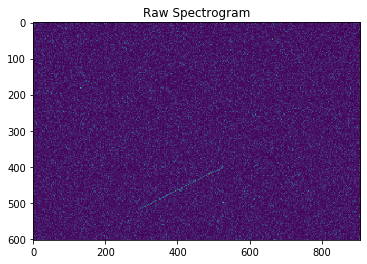

In [237]:
spec = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\spectrogram.png");
plt.imshow(spec),plt.title('Raw Spectrogram')
plt.show()

The Binary Classification will be carried out on the above Project 8 spectrogram. The Classification will be based on the condition that whether a pixel (of a certain intensity) is a mainband or a sideband.

The classification assumes that there is a single mainband surr

In [106]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.image as mpimg
import pandas
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.svm import LinearSVC

In [203]:
dataset=pandas.read_csv(r"\Users\Kaustav Dutta\Desktop\Band.csv")  
dataset.head(5)

,Pixel Intensity,Mainband,Sideband
0,50.588237,1,0
1,46.666668,1,0
2,40.784315,0,1
3,41.764707,0,1
4,44.509805,1,0


The threshold for a mainband has been set at 42. The threshold for a sideband has been set to 40 but less than 42.

In [235]:
dataset.shape

(2366, 3)

## 1. Logistic Regression on P8 spectrograms

In [204]:
X=dataset[['Pixel Intensity']]
y=dataset[['Mainband','Sideband']]

In [205]:
y = label_binarize(y, classes=[0,1])
n_classes = 2

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2)
logreg = OneVsRestClassifier(LogisticRegression(random_state=0))
logreg.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=0))

In [207]:
probas_ = logreg.fit(X_train, y_train).predict_proba(X_test)

In [208]:
y_pred= logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8911780243000528


In [209]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

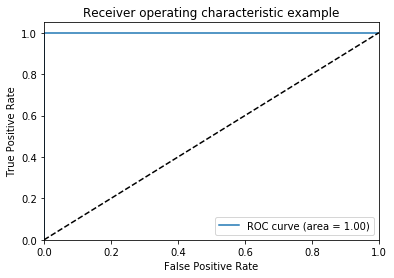

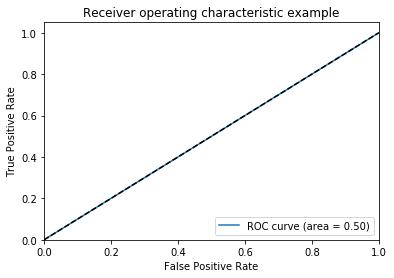

In [210]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## 2. Decision Trees on P8 spectrograms

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [212]:
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))

In [213]:
X=dataset[['Pixel Intensity']]
y=dataset[['Mainband','Sideband']]

In [214]:
y = label_binarize(y, classes=[0,1])
n_classes = 2

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0) 
probas_ = clf.fit(X_train, y_train).predict_proba(X_test)



In [216]:
y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [217]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

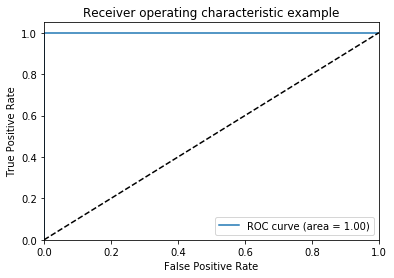

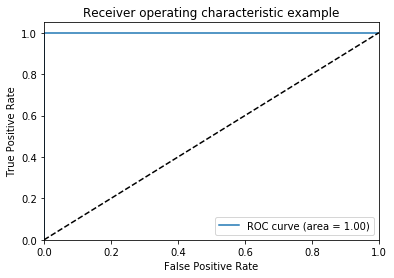

In [218]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## 3. Support Vector Machines on P8 spectrograms

In [219]:
X=dataset[['Pixel Intensity']]
y=dataset[['Mainband','Sideband']]

In [220]:
y = label_binarize(y, classes=[0,1])
n_classes = 2

In [221]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.8, random_state=0)

In [222]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Kaustav Dutta\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [223]:
y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7400950871632329


In [224]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

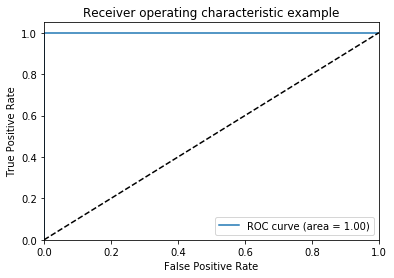

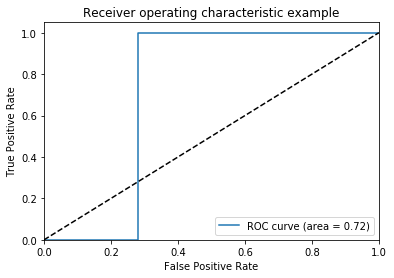

In [225]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## 4. KNN Classifier on P8 spectrograms

In [226]:
from sklearn.neighbors import KNeighborsClassifier 

In [228]:
X=dataset[['Pixel Intensity']]
y=dataset[['Mainband','Sideband']]

In [229]:
y = label_binarize(y, classes=[0,1])
n_classes = 2

In [230]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.8, random_state=42) 

In [231]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7) )
probas_ = knn.fit(X_train, y_train).predict_proba(X_test)

In [232]:
y_pred= knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98837823560486


In [233]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

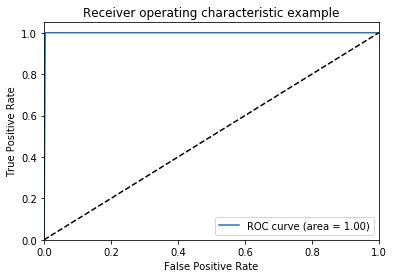

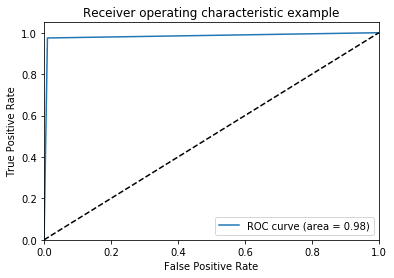

In [234]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

We thus, list down the test accuracies for the 4 classifications. It turns out that Decision Tree classifier emerges as the best model.

In [236]:
dataset=pandas.read_csv(r"\Users\Kaustav Dutta\Desktop\Accuracy.csv")  
dataset.head(5)

,Classifier,Accuracy
0,Logistic Regression,0.8912
1,Decision Tree,1.0000
2,Support Vector Machine,0.7401
3,K-Nearest Neighbors,0.9884
